In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from config_reader import Config
cfg = Config()

In [2]:
data = pd.read_excel("../results/" + cfg.mode + "/" + cfg.metric + ".xlsx")

In [3]:
data = data[:-1]

In [4]:
data

,Id,Description,Filename,Hyperparameters,Resulting_hyperparameters,Conf_mx_train_row1,Conf_mx_train_row2,Conf_mx_test_row1,Conf_mx_test_row2,BA_train,...,G_test,I_train,I_test,fpr_train,fpr_test,tpr_train,tpr_test,auc_train,auc_test,Comment
0,1,First network (10 epochs) with following layer...,Cyclone.ipynb,"(12, 0.5, 1.0, 50.0, 2.0)","[0.1012469578228546, 1.3518889736129378, 50.21...",[37. 67.],[ 216. 10210.],[15. 15.],[ 59. 2460.],0.569863,...,68.483088,0.007069,0.013433,0.006519,0.006061,0.146245,0.202703,0.646953,0.673994,Pretty nice.
1,2,"Same network, doubled the batch_size.",Cyclone_bs24.ipynb,"(24, 0.5, 1.0, 50.0, 2.0)","[0.14767121958700888, 1.315396569039503, 50.01...",[23. 51.],[ 230. 10226.],[ 9. 11.],[ 65. 2463.],0.542973,...,37.858288,0.003996,0.007429,0.004963,0.004446,0.090909,0.121622,0.500000,0.500000,Surprised statistics are unchanged
2,3,"Decreased amount of weights. w*b = d, a*b = e....",Cyclone_bs24_de.ipynb,"(24, 25.0, 50.0, 2.0)","[16.22554311126304, 58.74109040769373, 1.69754...",[ 217. 2590.],[ 36. 7687.],[ 64. 519.],[ 10. 1956.],0.802844,...,140.595058,0.019011,0.027578,0.252019,0.209697,0.857708,0.864865,0.822687,0.849568,"Crazy improvement on accuracy, but loss is ver..."
3,4,#8 but inrodcued a fully connected layer inste...,Cyclone_bs24_de_fc.ipynb,"(24, 25.0, 50.0)","[21.473467915485646, 53.359385095975036, -0.01...",[ 117. 1980.],[ 136. 8296.],[ 42. 441.],[ 32. 2034.],0.634884,...,54.035928,0.004342,0.010599,0.192682,0.178182,0.462451,0.567568,0.639169,0.700295,NaN
4,5,#12 but added additional layer with N neurons.,Cyclone_bs24_de_fc_50.ipynb,"(24, 25.0, 50.0)","[24.68038704188609, 50.52135963153863, -0.2352...",[14. 90.],[ 239. 10187.],[ 6. 27.],[ 68. 2447.],0.523289,...,13.132992,0.001289,0.002577,0.008757,0.010914,0.055336,0.081081,0.519186,0.528111,NaN
5,6,"Kept batch_size=24. Fixed b, c, and taught a a...",Cyclone_bs24_de_fixed_c.ipynb,"(24, 25.0, 50.0, 2.0)","[12.28896979130295, 62.65385386670118]",[158. 871.],[ 95. 9406.],[ 50. 166.],[ 24. 2309.],0.769877,...,168.481133,0.020892,0.033048,0.084752,0.067071,0.624506,0.675676,0.868346,0.895457,"Slight improvement on train, but degradation o..."
6,7,"Kept batch_size=24. Fixed c, and taught d and ...",Cyclone_bs24_de_fixed_c_individual_d.ipynb,"(24, 25, 50.0, 2.0)","[24.87046767764879, 80.37724033952323]",[ 225. 3213.],[ 28. 7063.],[ 66. 649.],[ 8. 1825.],0.788329,...,126.470330,0.017038,0.024818,0.312670,0.262328,0.889328,0.891892,0.802464,0.830347,"Slight improvement on train, but degradation o..."
7,8,"Kept batch_size=24. Fixed c, maxpool kernel = 3",Cyclone_bs24_de_fixed_c_mpk3.ipynb,"(24, 25.0, 50.0, 2.0)","[15.92891528087388, 59.03124590095707]",[ 209. 2295.],[ 44. 7982.],[ 62. 452.],[ 12. 2023.],0.801386,...,144.058996,0.019115,0.028258,0.223314,0.182626,0.826087,0.837838,0.832632,0.861589,"Slight improvement on train, but degradation o..."
8,9,"Decreased amount of weights. w*b = d, a*b = e....",Cyclone_bs24_de_individual_d.ipynb,"(24, 25, 50.0, 2.0)","[23.34613924628127, 52.71054096143292, 2.54126...",[ 242. 5354.],[ 11. 4923.],[ 70. 1144.],[ 4. 1330.],0.717776,...,79.807291,0.011238,0.015661,0.520969,0.462409,0.956522,0.945946,0.718817,0.747149,Surprised it performed worse than #8 (multiple...
9,10,#8 but with maxpooling kernel = 3,Cyclone_bs24_de_mpk3.ipynb,"(24, 25.0, 50.0, 2.0)","[15.962038215573319, 58.99740815983707, 1.6286...",[ 214. 2422.],[ 39. 7855.],[ 65. 480.],[ 9. 1994.],0.805089,...,155.997398,0.019452,0.030612,0.235672,0.194018,0.845850,0.878378,0.827754,0.854297,Loss around 50.


In [5]:
data['Filename'].values

array(['Cyclone.ipynb', 'Cyclone_bs24.ipynb', 'Cyclone_bs24_de.ipynb',
       'Cyclone_bs24_de_fc.ipynb', 'Cyclone_bs24_de_fc_50.ipynb',
       'Cyclone_bs24_de_fixed_c.ipynb',
       'Cyclone_bs24_de_fixed_c_individual_d.ipynb',
       'Cyclone_bs24_de_fixed_c_mpk3.ipynb',
       'Cyclone_bs24_de_individual_d.ipynb', 'Cyclone_bs24_de_mpk3.ipynb',
       'Cyclone_bs24_de_mpk4.ipynb', 'Cyclone_bs24_de_mpk6.ipynb',
       'Cyclone_bs24_de_small_weights.ipynb',
       'Cyclone_bs24_fixed_a_b_c.ipynb', 'Cyclone_bs24_fixed_b_c.ipynb',
       'Cyclone_bs24_fixed_c.ipynb', 'Cyclone_bs24_individual_w.ipynb',
       'Cyclone_bs24_no_maxpool.ipynb'], dtype=object)

In [6]:
names = data['Filename'].values.tolist()
names = [name.strip('.ipynb') for name in names]

fpr_test = data['fpr_test']
tpr_test = data['tpr_test']
fpr_train = data['fpr_train']
tpr_train = data['tpr_train']

indices = data['Id'].values.tolist()[:-1]

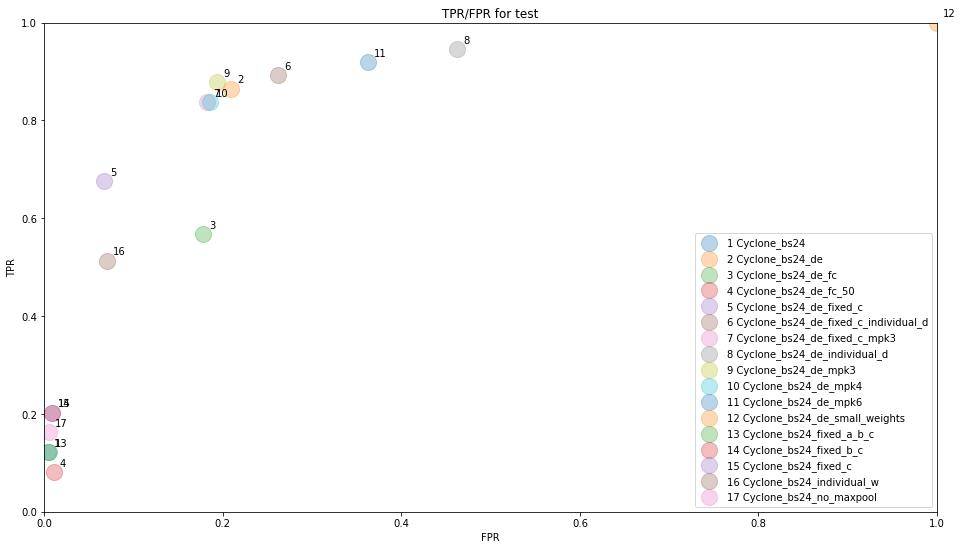

In [7]:
plt.rcParams["figure.figsize"] = (16, 9)
fig, ax = plt.subplots()

#indices=[1, 2, 3, 4]

ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
for i in indices:
    ax.scatter(x=fpr_test[i], y=tpr_test[i], alpha=0.3, label=str(i) + " " + names[i], marker='o', s=260)
    ax.annotate(str(i), (fpr_test[i], tpr_test[i]), xytext=(6, 6), textcoords='offset pixels', size=10)
    
ax.set_title("TPR/FPR for test")
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.legend(loc=4)

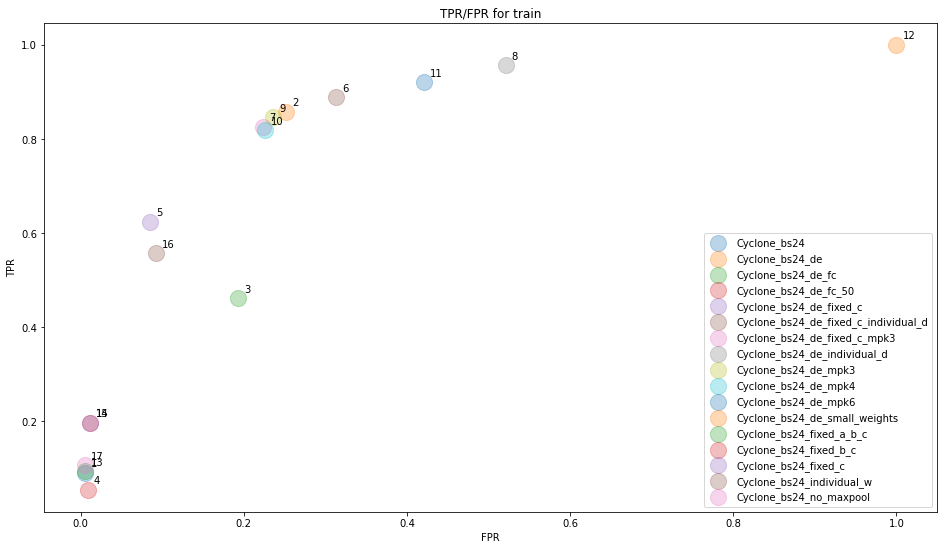

In [8]:
fig, ax = plt.subplots()

for i in indices:
    ax.scatter(x=fpr_train[i], y=tpr_train[i], alpha=0.3, label=names[i], marker='o', s=260)
    ax.annotate(str(i), (fpr_train[i], tpr_train[i]), xytext=(6, 6), textcoords='offset pixels', size=10)

ax.set_title("TPR/FPR for train")
ax.set_ylabel("TPR")
ax.set_xlabel("FPR")
ax.legend()